In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split


In [31]:
cars = pd.read_csv("vehicles_cleaned.csv")

In [26]:
cars.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,7222695916,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7218891961,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7221797935,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7222270760,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7210384030,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cars.columns

Index(['id', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'lat', 'long'],
      dtype='object')

In [18]:
print(f'''{cars.manufacturer.value_counts()}
{cars.condition.value_counts()}
{cars.cylinders.value_counts()}
{cars.fuel.value_counts()}
{cars.title_status.value_counts()}
{cars.transmission.value_counts()}
{cars.drive.value_counts()}
{cars.type.value_counts()}
{cars.paint_color.value_counts()}''')

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [21]:
cars["size"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
426875    NaN
426876    NaN
426877    NaN
426878    NaN
426879    NaN
Name: size, Length: 426880, dtype: object

In [34]:
cars = cars.drop(["size","paint_color","lat","long"],axis=1)

In [35]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 42.3+ MB


In [36]:
cars.shape

(426880, 13)

In [37]:
cars.isnull().sum()

id                   0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
dtype: int64

In [41]:
cars = cars.dropna(subset=['manufacturer', 'model'], how='all')

In [42]:
cars.isnull().sum()

id                   0
price                0
year              1137
manufacturer     17577
model             5208
condition       174036
cylinders       177609
fuel              2945
odometer          4332
title_status      8174
transmission      2488
drive           130498
type             92789
dtype: int64

In [45]:
new = cars.dropna()
new.isnull().sum()

id              0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
dtype: int64

In [46]:
new.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
31,7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck
32,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup
33,7316304717,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup
34,7316285779,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck
35,7316257769,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup


In [48]:
print(f'''
{cars.condition.value_counts()}
{cars.cylinders.value_counts()}
{cars.fuel.value_counts()}
{cars.title_status.value_counts()}
{cars.transmission.value_counts()}
{cars.drive.value_counts()}
{cars.type.value_counts()}
''')


condition
good         121455
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64
cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64
fuel
gas         356208
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64
title_status
clean         405116
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64
transmission
automatic    336524
other         62682
manual        25117
Name: count, dtype: int64
drive
4wd    131904
fwd    105517
rwd     58892
Name: count, dtype: int64
type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          

In [49]:
'''
Condition Column:
new          0
like new     1
excellent    2
good         3
fair         4
salvage      5
'''
new.replace({"condition":{"new":0 ,"like new":1, "excellent":2, "good": 3, "fair":4, "salvage":5}}, inplace = True)

C:\Users\motas\AppData\Local\Temp\ipykernel_16660\1309276189.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new.replace({"condition":{"new":0 ,"like new":1, "excellent":2, "good": 3, "fair":4, "salvage":5}}, inplace = True)
C:\Users\motas\AppData\Local\Temp\ipykernel_16660\1309276189.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.replace({"condition":{"new":0 ,"like new":1, "excellent":2, "good": 3, "fair":4, "salvage":5}}, inplace = True)


In [55]:
'''
cylinders Column: 
6 cylinders     0
4 cylinders     1
8 cylinders     2
5 cylinders     3
10 cylinders    4
other           5
3 cylinders     6
12 cylinders    7
'''
new['cylinders'] = new['cylinders'].replace({
    '6 cylinders': 0,
    '4 cylinders': 1,
    '8 cylinders': 2,
    '5 cylinders': 3,
    '10 cylinders': 4,
    'other': 5,
    '3 cylinders': 6,
    '12 cylinders': 7
})

C:\Users\motas\AppData\Local\Temp\ipykernel_16660\1893448115.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['cylinders'] = new['cylinders'].replace({


In [57]:
'''
fuel column
gas         0
other        1
diesel       2
hybrid        3
electric      4
'''
new['fuel'] = new['fuel'].replace({
    'gas': 0,
    'other': 1,
    'diesel': 2,
    'hybrid': 3,
    'electric': 4
})

C:\Users\motas\AppData\Local\Temp\ipykernel_16660\2039043235.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new['fuel'] = new['fuel'].replace({
C:\Users\motas\AppData\Local\Temp\ipykernel_16660\2039043235.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['fuel'] = new['fuel'].replace({


In [58]:
'''
type column
sedan          0
SUV            1
pickup         2
truck          3
other          4
coupe          5
hatchback      6
wagon          7
van             8
convertible     9
mini-van        10
offroad          11
bus              12
'''
new['type'] = new['type'].replace({
    'sedan': 0,
    'SUV': 1,
    'pickup': 2,
    'truck': 3,
    'other': 4,
    'coupe': 5,
    'hatchback': 6,
    'wagon': 7,
    'van': 8,
    'convertible': 9,
    'mini-van': 10,
    'offroad': 11,
    'bus': 12
})

C:\Users\motas\AppData\Local\Temp\ipykernel_16660\263609525.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new['type'] = new['type'].replace({
C:\Users\motas\AppData\Local\Temp\ipykernel_16660\263609525.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['type'] = new['type'].replace({


In [60]:
'''
title_status
clean         405116
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
'''
new['title_status'] = new['title_status'].replace({
    'clean': 0,
    'rebuilt': 1,
    'salvage': 2,
    'lien': 3,
    'missing': 4,
    'parts only': 5
})


C:\Users\motas\AppData\Local\Temp\ipykernel_16660\3018498333.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new['title_status'] = new['title_status'].replace({
C:\Users\motas\AppData\Local\Temp\ipykernel_16660\3018498333.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['title_status'] = new['title_status'].replace({


In [62]:
new['transmission'] = new['transmission'].replace({
    'automatic': 0,
    'other': 1,
    'manual': 2
})


C:\Users\motas\AppData\Local\Temp\ipykernel_16660\620639346.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new['transmission'] = new['transmission'].replace({
C:\Users\motas\AppData\Local\Temp\ipykernel_16660\620639346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['transmission'] = new['transmission'].replace({


In [64]:
new['drive'] = new['drive'].replace({
    '4wd': 0,
    'fwd': 1,
    'rwd': 2
})


C:\Users\motas\AppData\Local\Temp\ipykernel_16660\2525833801.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new['drive'] = new['drive'].replace({
C:\Users\motas\AppData\Local\Temp\ipykernel_16660\2525833801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['drive'] = new['drive'].replace({


In [65]:
new.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
31,7316356412,15000,2013.0,ford,f-150 xlt,2,0,0,128000.0,0,0,2,3
32,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,3,2,0,68696.0,0,1,0,2
33,7316304717,34590,2016.0,chevrolet,silverado 1500 double,3,0,0,29499.0,0,1,0,2
34,7316285779,35000,2019.0,toyota,tacoma,2,0,0,43000.0,0,0,0,3
35,7316257769,29990,2016.0,chevrolet,colorado extended cab,3,0,0,17302.0,0,1,0,2


In [70]:
new['year'][31]

np.float64(2013.0)

In [73]:
new = new.reset_index(drop=True)
new.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
0,7316356412,15000,2013.0,ford,f-150 xlt,2,0,0,128000.0,0,0,2,3
1,7316343444,27990,2012.0,gmc,sierra 2500 hd extended cab,3,2,0,68696.0,0,1,0,2
2,7316304717,34590,2016.0,chevrolet,silverado 1500 double,3,0,0,29499.0,0,1,0,2
3,7316285779,35000,2019.0,toyota,tacoma,2,0,0,43000.0,0,0,0,3
4,7316257769,29990,2016.0,chevrolet,colorado extended cab,3,0,0,17302.0,0,1,0,2


In [74]:
new['year'][0]

np.float64(2013.0)

In [75]:
new['year'] = new['year'].astype(int)


In [76]:
new['year'][0]

np.int64(2013)

In [77]:
new.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
0,7316356412,15000,2013,ford,f-150 xlt,2,0,0,128000.0,0,0,2,3
1,7316343444,27990,2012,gmc,sierra 2500 hd extended cab,3,2,0,68696.0,0,1,0,2
2,7316304717,34590,2016,chevrolet,silverado 1500 double,3,0,0,29499.0,0,1,0,2
3,7316285779,35000,2019,toyota,tacoma,2,0,0,43000.0,0,0,0,3
4,7316257769,29990,2016,chevrolet,colorado extended cab,3,0,0,17302.0,0,1,0,2


In [78]:
X = new.drop(["id","price","manufacturer","model"],axis=1)
Y = new["price"]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)

In [80]:
Model = LinearRegression()

In [81]:
Model.fit(x_train,y_train)

LinearRegression()

In [82]:
y_pred = Model.predict(x_test)

In [83]:
# Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared
r2 = metrics.r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAE: 71141.58566652273
MSE: 1201114151563.0957
RMSE: 1095953.5353121024
R-squared: -0.0028937762912615295


Text(0, 0.5, 'Predicted_Price')

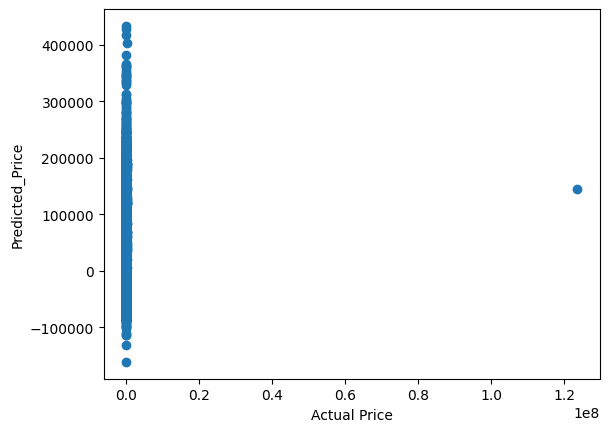

In [86]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted_Price")